# 🚀 Transfer Learning com MobileNetV2 (Completo)
Transfer Learning com MobileNetV2, augmentations otimizadas, fine-tuning progressivo e avaliação com imagens reais e matriz de confusão.

In [1]:
!pip3 install tensorflow matplotlib scikit-learn
!pip3 uninstall numpy -y
!pip3 install numpy==1.26.4
!pip3 install scipy
!pip3 install pandas


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=10,
    fill_mode='nearest',
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16000 images belonging to 20 classes.
Found 4000 images belonging to 20 classes.


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=callbacks)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 179s 354ms/step - accuracy: 0.4867 - loss: 1.9239 - val_accuracy: 0.9875 - val_loss: 0.1491 - learning_rate: 1.0000e-04
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 171s 342ms/step - accuracy: 0.9748 - loss: 0.1884 - val_accuracy: 0.9977 - val_loss: 0.0423 - learning_rate: 1.0000e-04
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 180s 361ms/step - accuracy: 0.9912 - loss: 0.0776 - val_accuracy: 0.9990 - val_loss: 0.0212 - learning_rate: 1.0000e-04
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 178s 356ms/step - accuracy: 0.9939 - loss: 0.0474 - val_accuracy: 0.9987 - val_loss: 0.0134 - learning_rate: 1.0000e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 172s 343ms/step - accuracy: 0.9956 - loss: 0.0314 - val_accuracy: 0.9998 - val_loss: 0.0092 - learning_rate: 1.0000e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 166s 332ms/step - accuracy: 0.9979 - loss: 0.0219 - val_accuracy: 0.9990 - val_loss: 0.0067 - learning_rate: 1.0000e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
# Fine-tuning parcial
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=callbacks)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 270s 529ms/step - accuracy: 0.9608 - loss: 0.1400 - val_accuracy: 0.9995 - val_loss: 0.0026 - learning_rate: 1.0000e-05
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 280s 558ms/step - accuracy: 0.9985 - loss: 0.0164 - val_accuracy: 0.9995 - val_loss: 0.0015 - learning_rate: 1.0000e-05
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 316s 632ms/step - accuracy: 0.9991 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 5.2026e-04 - learning_rate: 1.0000e-05
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 326s 650ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 2.5587e-04 - learning_rate: 1.0000e-05
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 264s 528ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 1.5363e-04 - learning_rate: 1.0000e-05
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 231s 461ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 2.0044e-04 - learning_rate: 1.0000e-05
Epoch 7/10
500/500 ━━━━━

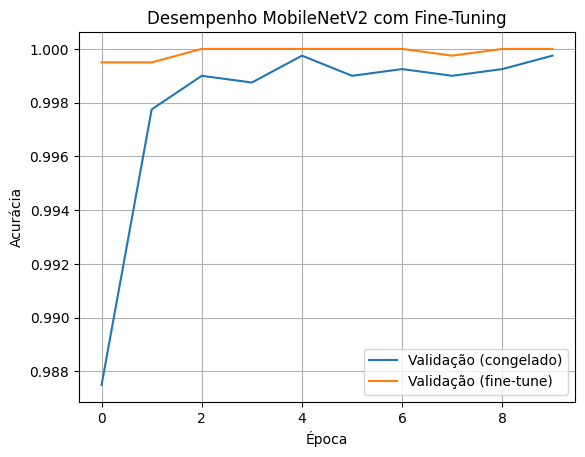

In [7]:
# Visualização do desempenho
plt.plot(history.history['val_accuracy'], label='Validação (congelado)')
plt.plot(history_finetune.history['val_accuracy'], label='Validação (fine-tune)')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Desempenho MobileNetV2 com Fine-Tuning")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Salvar modelo treinado
model.save("modelo_mobilenetv2_finetuned.h5")

125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 291ms/step


<Figure size 1000x1000 with 0 Axes>

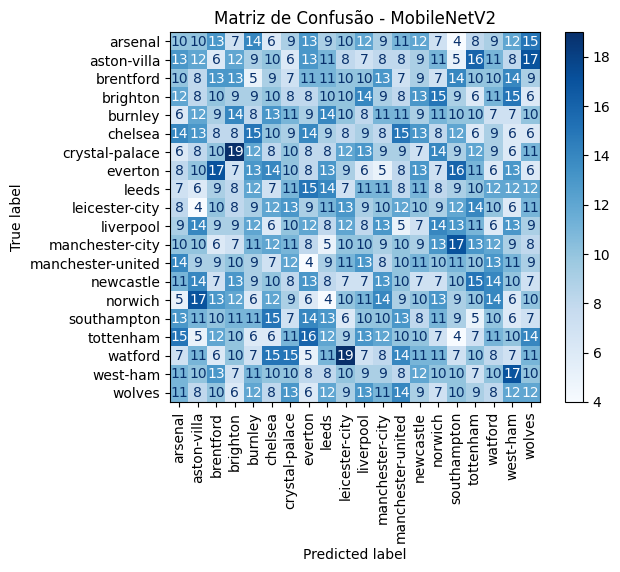

In [9]:
# Matriz de confusão
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Matriz de Confusão - MobileNetV2")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


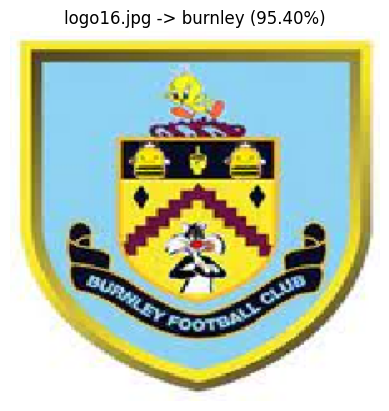

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


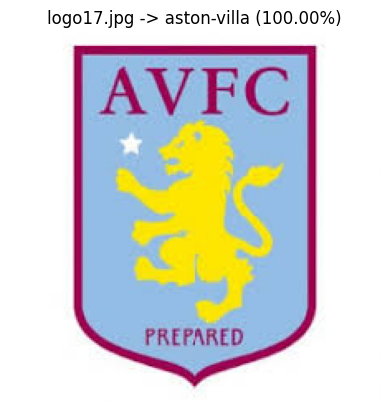

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


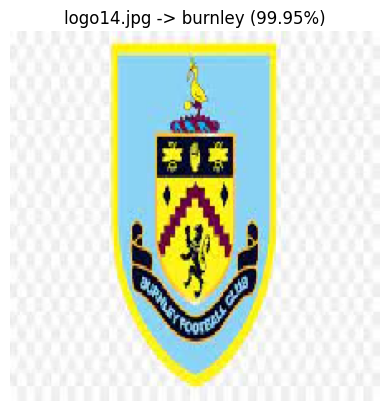

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


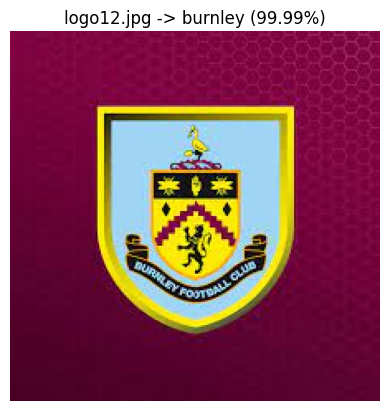

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


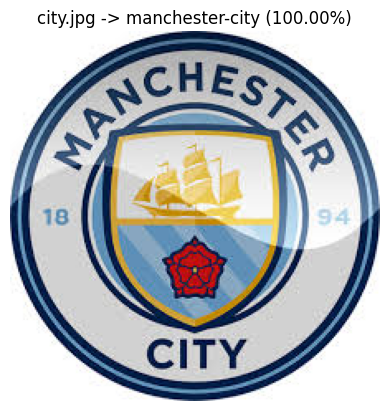

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


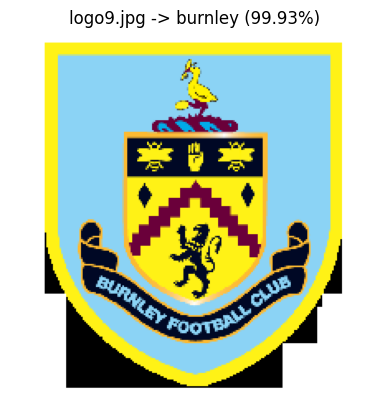

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


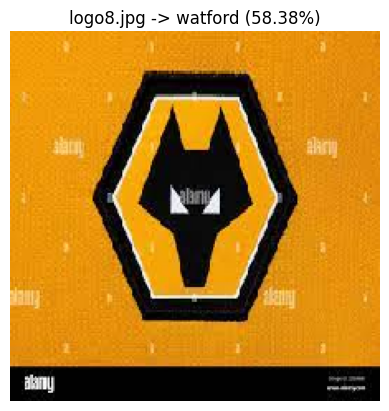

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


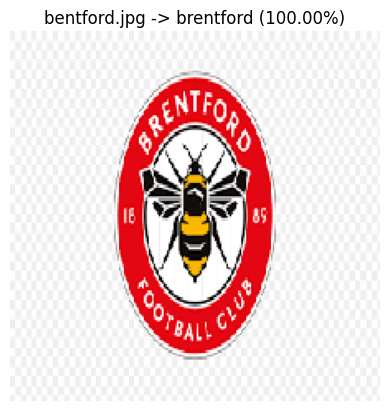

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


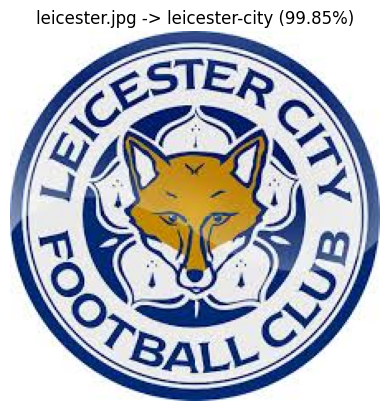

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


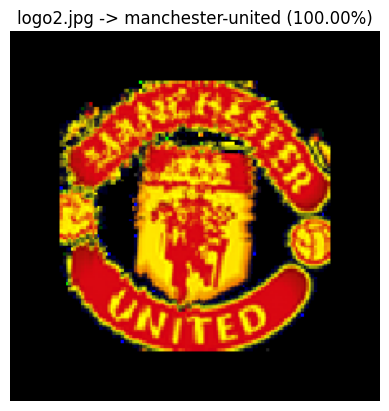

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


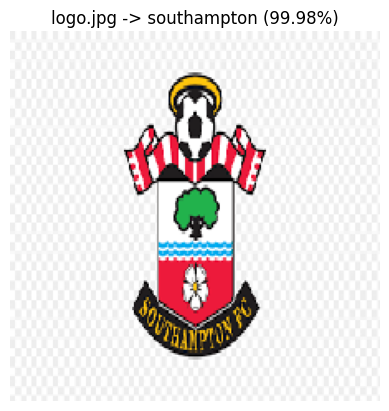

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


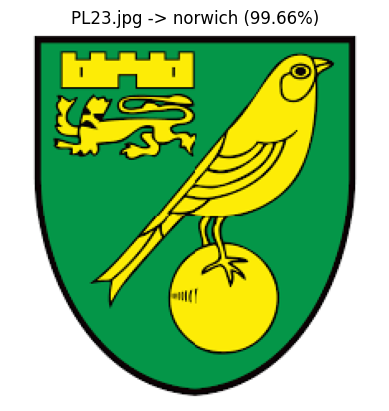

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


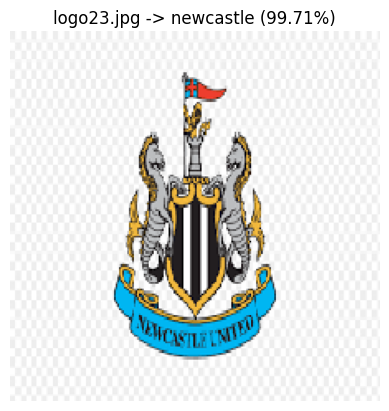

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


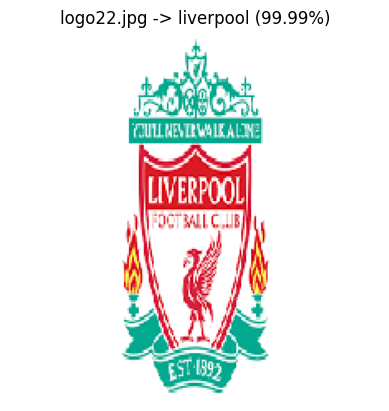

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


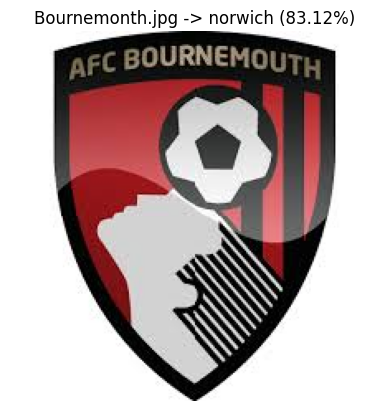

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


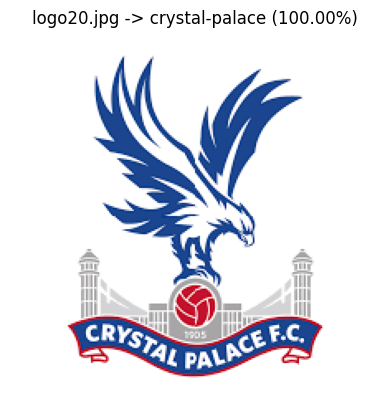

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


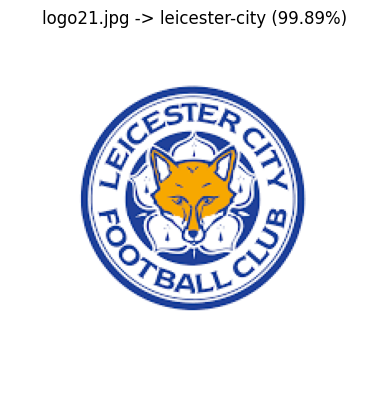

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


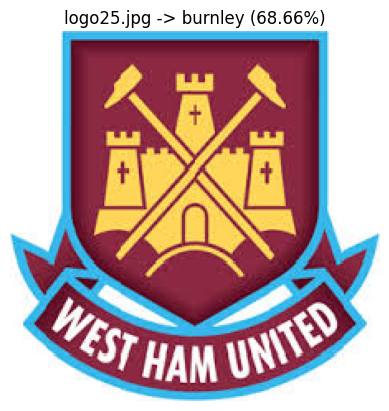

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


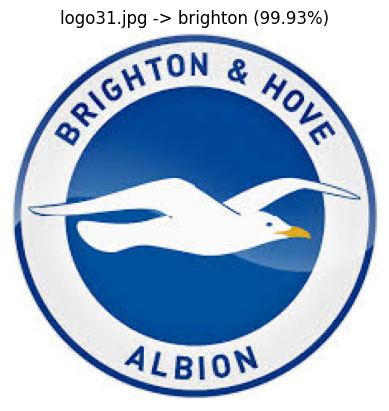

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


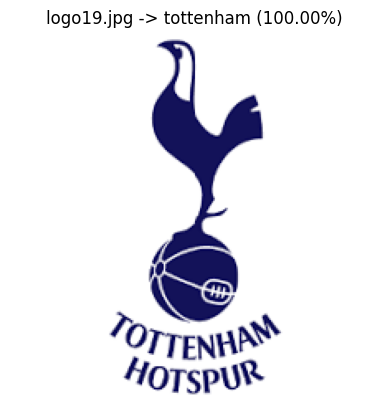

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


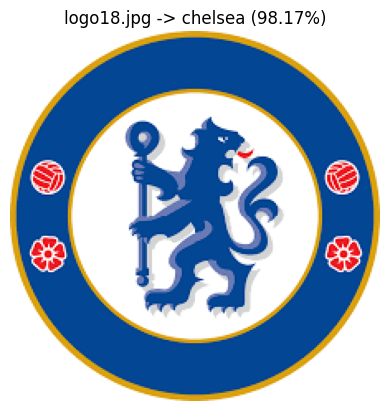

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


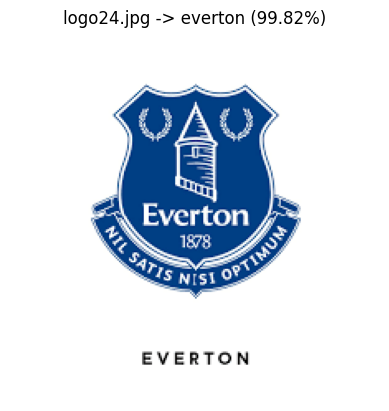

In [12]:
from pathlib import Path
# Testar com imagens reais
test_folder = Path("Imagens_Teste/")
for img_path in test_folder.glob("*.jpg"):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array)
    pred_index = np.argmax(pred[0])
    pred_label = class_labels[pred_index]
    conf = pred[0][pred_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_path.name} -> {pred_label} ({conf*100:.2f}%)")
    plt.show()